In [1]:
# Importing comet_ml
import comet_ml
from comet_ml import Experiment
#from comet_ml.integration.pytorch import log_model

# Creating an experiment with api key

experiment = Experiment(
  api_key = "Z3zS1quxrC1NIIK61rNNhVKdg",
  project_name = "Language Classification",
  workspace="sorach-roshe"
)
# suppress cell warnings
import warnings
warnings.filterwarnings("ignore")

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/sorach-roshe/language-classification/371c1b33f7204a8ca38836b40f9a1ee3



In [2]:
# utilities
# Importing the Libraries 
import re  # for pattern matching and manipulation of strings.
import numpy as np  # used for numerical computations and data manipulation.
import pandas as pd  # for data manipulation and analysis.
import string  # for string manipulation tasks.

# For plotting
import seaborn as sns  # for data visualization.
from wordcloud import WordCloud  # used to generate word clouds.
import matplotlib.pyplot as plt  # used for plotting data.

# nltk
from nltk.stem import WordNetLemmatizer  # used for lemmatizing words
from nltk.tokenize import TreebankWordTokenizer  # used for tokenizing sentences into words.
from nltk import SnowballStemmer  # used for stemming words.

# sklearn
from sklearn.svm import LinearSVC  # used for solving linear classification problems. 
from sklearn.naive_bayes import BernoulliNB  # implementation of the Naive Bayes algorithm.
from sklearn.linear_model import LogisticRegression  # implementation of logistic regression.  
from sklearn.model_selection import train_test_split  # for splitting a dataset into training and testing subsets.
from sklearn.feature_extraction.text import TfidfVectorizer  # for converting text documents into a numerical representation.
from sklearn.metrics import confusion_matrix, classification_report  # for evaluating the performance of a classification model
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn import preprocessing  # for data preprocessing
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
import timeit
# suppress cell warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("train_set.csv") # reads a CSV file named "train.csv" and stores it in Pandas df.
df_test = pd.read_csv("test_set.csv") # reads "test_with_no_labels.csv" and stores it in Pandas df_test.

In [4]:
df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [5]:
df_test.head(20)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
5,6,"Ke feela dilense tše hlakilego, tša pono e tee..."
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"So, on occasion, are statistics misused."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [8]:
np.sum(df.isnull().any(axis=1))

0

In [9]:
df.duplicated() 

0        False
1        False
2        False
3        False
4        False
         ...  
32995    False
32996     True
32997    False
32998    False
32999    False
Length: 33000, dtype: bool

In [10]:
df.drop_duplicates()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...
32994,eng,manuel marin s ill-fated debt sources but very...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32997,eng,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...


In [42]:
df.shape

(33000, 2)

In [11]:
df.dtypes

lang_id    object
text       object
dtype: object

In [12]:
df.describe()

,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


In [13]:
# Checking the shape of the datasets
print(f'The shape of the train dataset: {df.shape}\nThe shape of the test dataset: {df_test.shape}')

The shape of the train dataset: (33000, 2)
The shape of the test dataset: (5682, 2)


In [14]:
df['lang_id'].unique()

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

In [15]:
df['lang_id'].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

<AxesSubplot:xlabel='lang_id', ylabel='count'>

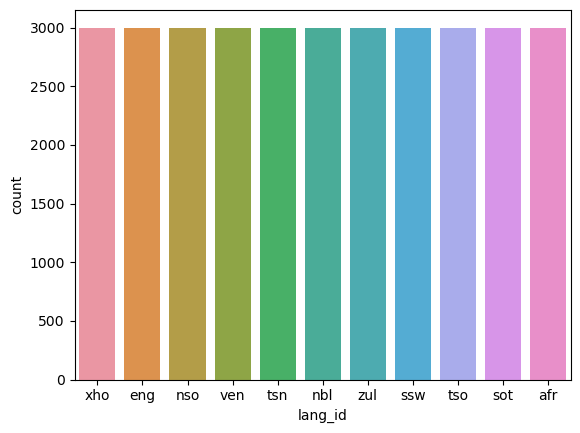

In [16]:
# To creates a countplot
sns.countplot(x='lang_id', data=df)

In [43]:
# Change to lowercase
df['text']=df['text'].str.lower()
df_test['text'] = df_test['text'].str.lower()
df['text'].tail()

32995    popo ya dipolateforomo tse ke go tlisa boetele...
32996    modise mosadi na o ntse o sa utlwe hore thaban...
32997    closing date for the submission of completed t...
32998    nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999    mafapha a mang le ona a lokela ho etsa ditlale...
Name: text, dtype: object

In [44]:
# remove punctuation
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [45]:
df['text'] = df['text'].apply(remove_punctuation)
df_test['text'] = df_test['text'].apply(remove_punctuation)

In [46]:
# Tokenise
tokeniser = TreebankWordTokenizer()
df['tokens'] = df['text'].apply(tokeniser.tokenize)

In [47]:
# Lemmatization
lemmatizer = WordNetLemmatizer()

In [48]:
# Separating input feature and label
X = df.text
y = df.lang_id

In [49]:
# Separating the 80% data for training data and 20% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [50]:
# Transforming the Dataset Using TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,3), max_features=500000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 3))

In [51]:
X_train_vect = vectoriser.transform(X_train)
X_test_vect = vectoriser.transform(X_test)

In [52]:
test_X = vectoriser.transform(df_test.text)

In [53]:
import timeit
start = timeit.default_timer()

# Bernoulli model
BNBmodel = BernoulliNB(alpha=0.001, binarize=0.1, fit_prior=True)
BNBmodel.fit(X_train_vect, y_train)
y_pred1 = BNBmodel.predict(X_test_vect)

end = timeit.default_timer()
execution_time = end - start
print(f"Execution time: {execution_time} seconds")

Execution time: 0.6674242000003687 seconds


In [54]:
start = timeit.default_timer()

# SVC model
SVCmodel = LinearSVC()
SVCmodel.fit(X_train_vect, y_train)
y_pred2 = SVCmodel.predict(X_test_vect)

end = timeit.default_timer()
execution_time = end - start
print(f"Execution time: {execution_time} seconds")

Execution time: 4.006199400000241 seconds


In [55]:
start = timeit.default_timer()

# Logistic regression model
LRparams = {'C': 10, 'multi_class': 'auto', 'n_jobs': -1, 'penalty': 'l2', 'solver': 'sag'}
LRmodel = LogisticRegression(multi_class='auto', max_iter=5000, n_jobs=-1, penalty='l2', solver='sag')
LRmodel.fit(X_train_vect, y_train)
y_pred3 = LRmodel.predict(X_test_vect)

end = timeit.default_timer()
execution_time = end - start
print(f"Execution time: {execution_time} seconds")

Execution time: 5.796936600000208 seconds


In [56]:
start = timeit.default_timer()

# Voting Classifier
vc = VotingClassifier(estimators=[('bnb', BNBmodel), ('lr', LRmodel), ('svc', SVCmodel)], voting='hard')
vc = vc.fit(X_train_vect, y_train)
y_pred4 = vc.predict(X_test_vect)

end = timeit.default_timer()
execution_time = end - start
print(f"Execution time: {execution_time} seconds")

Execution time: 37.87580369999978 seconds


In [57]:
# classification report of models

models = {
    'Bernoulli Naive Bayes': BNBmodel,
    'Support Vector Classifier': SVCmodel,
    'Logistic Regression': LRmodel,
    'Voting Classifier': vc
}

for model_name, model in models.items():
    print(f"Model: {model_name}")
    y_pred = model.predict(X_test_vect)
    report = classification_report(y_test, y_pred)
    print(report)
    print('-' * 60)

Model: Bernoulli Naive Bayes
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       1.00      0.99      1.00       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       0.99      0.99      0.99       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600

------------------------------------------------------------
Model: Support Vector Classifier
              precision    recall  f1-score   support

         

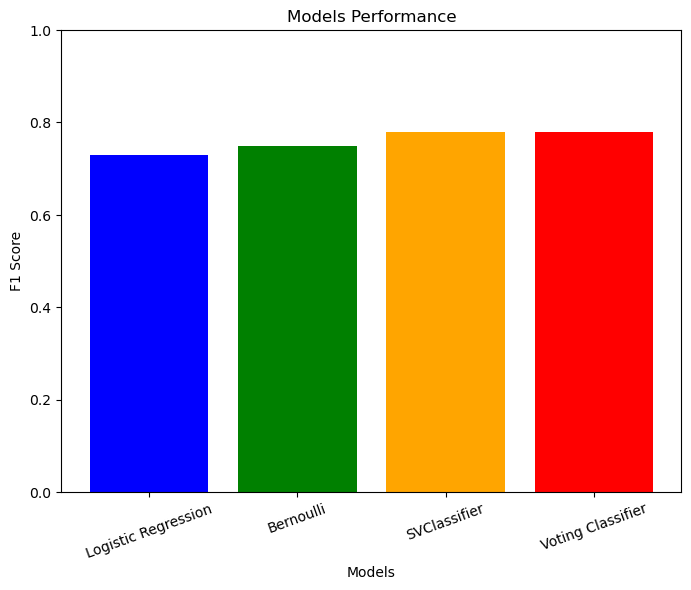

In [59]:
# Sort the F1 scores and models in ascending order
f1_scores = [0.75, 0.78, 0.73, 0.78]
models = ['Bernoulli', 'SVClassifier', 'Logistic Regression', 'Voting Classifier']
f1_scores = np.array(f1_scores)
models = np.array(models)
sorted_indices = np.argsort(f1_scores)
f1_scores_sorted = f1_scores[sorted_indices]
models_sorted = models[sorted_indices]

# Define colors for each bar
colors = ['blue', 'green', 'orange', 'red']

# Plotting the bar graph with multiple colors
plt.figure(figsize=(8, 6))
plt.bar(models_sorted, f1_scores_sorted, color=colors)
plt.title('Models Performance')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.ylim(0, 1)  # Set the y-axis limits
plt.xticks(rotation=20)  # Rotate the x-axis labels for better readability
plt.show()

In [61]:
y_pred1 = y_pred1[:len(df_test)]

In [62]:
results_df_bern = pd.DataFrame({'index': df_test['index'], 'lang_id': y_pred1})
results_df_bern.to_csv('results_df_bern.csv', index=False)
results_df_bern.head()

,index,lang_id
0,1,sot
1,2,nso
2,3,eng
3,4,nso
4,5,nso


In [64]:
y_pred2 = y_pred2[:len(df_test)]

In [65]:
results_df_svc = pd.DataFrame({'index': df_test['index'], 'lang_id': y_pred2})
results_df_svc.to_csv('results_df_svc.csv', index=False)
results_df_svc.head()

,index,lang_id
0,1,sot
1,2,nso
2,3,eng
3,4,nso
4,5,nso


In [66]:
y_pred3 = y_pred3[:len(df_test)]

In [67]:
results_df_lgs = pd.DataFrame({'index': df_test['index'], 'lang_id': y_pred3})
results_df_lgs.to_csv('results_df_lgs.csv', index=False)
results_df_lgs.head()

,index,lang_id
0,1,sot
1,2,nso
2,3,eng
3,4,nso
4,5,nso


In [68]:
y_pred4 = y_pred4[:len(df_test)]

In [69]:
results_df_vc = pd.DataFrame({'index': df_test['index'], 'lang_id': y_pred4})
results_df_vc.to_csv('results_df_vc.csv', index=False)
results_df_vc.head()

,index,lang_id
0,1,sot
1,2,nso
2,3,eng
3,4,nso
4,5,nso


In [71]:
experiment.end()